# DARE-Newcrest data challenge - flotation plant dataset
DARE 2022

In this notebook, we will provide a template for the DARE-Newcrest data challenge. The main steps covered here will be:

- Load the data
- Provide an overview of what is in the data
- Provide an example of a terribly performing baseline model
- Provide functions to quantify model predictive performance

In [1]:
# magic
%load_ext autoreload
%autoreload 2
%pdb 1
%matplotlib inline

Automatic pdb calling has been turned ON


## Imports and settings
Everything we need to get started.

In [2]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt

# data
from functions.data_functions import(load_raw_data) 

## Load the data
Briefly look at the contents and structure of the data.

In [11]:
process_data = load_raw_data()
process_data.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [5]:
# lets look at some properties of the data 
print('Number of features: {}'.format(process_data.shape[1]))
print('Number of observations: {}'.format(process_data.shape[0]))

print('Variable names: {}'.format(process_data.columns.tolist()))

process_data.describe()

Number of features: 23
Number of observations: 737453
Variable names: ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


## Dataset description
Our task is to predict the `% Silica Concentrate` based on the available features.

From [the Kaggle page](https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process?datasetId=6294&sortBy=voteCount):
<br>
<br>
"The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly basis.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab. 

Target is to predict the last column, which is the % of silica in the iron ore concentrate."


We have hourly values for:
- `% Iron Feed`
- `% Silica Feed`
- `% Iron Concentrate`
- `% Silica Concentrate`


Cleaning:
I am not sure of the interpolation that might have been done before these data were posted online, I have removed a long run of constant values ('2017-07-31 20:00':'2017-08-03 20:00'), I will use this is as a split between training and test data. I have also just thrown out the data up to late March, as people may want to apply timeseries approaches. There are still a lot of smaller stretches of what looks to be problematic data (I think someone has interpolated across null values).

We want to be sure that we are not 

In [6]:
# First of all lets resample hourly taking the mean of each of the process variables
hourly_data = process_data.resample('H').mean()
hourly_data.loc['2017-07-31 20:00':'2017-08-03 20:00','% Silica Concentrate'] = np.nan
print('Number of hourly observations: {} of {}'.format(hourly_data.dropna().shape[0],hourly_data.shape[0]))

Number of hourly observations: 4024 of 4415


Training data

Training data is around 67.59% of the total data
Training - number of hourly observations: 2984 of 2984


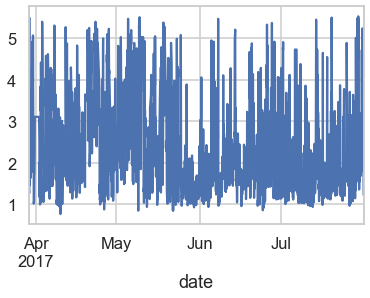

In [7]:
train_data = hourly_data.loc['2017-03-29 12:00:00 ':'2017-07-31 19:00:00',:]
print('Training data is around {:.2f}% of the total data'.format(train_data.shape[0]/hourly_data.shape[0]*100))
print('Training - number of hourly observations: {} of {}'.format(train_data.dropna().shape[0],train_data.shape[0]))
train_data['% Silica Concentrate'].plot()
None

Test data

Test data is around 20.18% of the total data
Test - number of hourly observations: 891 of 891


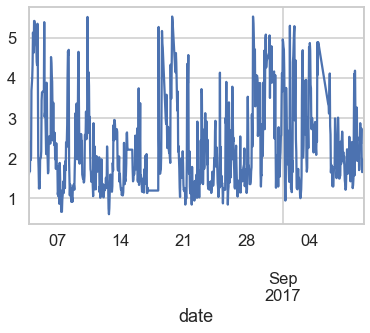

In [11]:
# now split the test data - conveniently about 20%
test_data = hourly_data.loc['2017-08-03 21:00':,:]
print('Test data is around {:.2f}% of the total data'.format(test_data.shape[0]/hourly_data.shape[0]*100))
print('Test - number of hourly observations: {} of {}'.format(test_data.dropna().shape[0],test_data.shape[0]))
# quick plot
test_data['% Silica Concentrate'].plot()
None

In [12]:
# Lets now save the training and test data as hourly mean
train_data.to_csv('data/hourly_train_data.csv')
test_data.to_csv('data/hourly_test_data.csv')